# Bank Churn Prediction


Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers
leaving and joining another service provider. It is important to understand which aspects of the service
influence a customer's decision in this regard. Management can concentrate efforts on improvement of
service, keeping in mind these priorities. 



In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


## 1.0 Data

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Checking the balance of the target

Class 0: 7963
Class 1: 2037
Proportion: 3.91 : 1


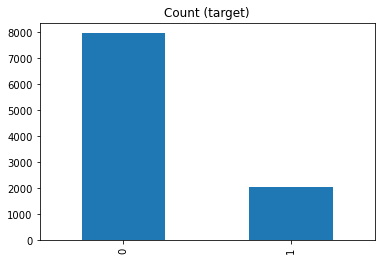

In [47]:
target_count = df.Exited.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

### 1.1 Data pre-processing

#### Drop unique customer columns

In [6]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [7]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


#### Ecode categorical features

We ecode the Geography and Gender features 

In [8]:
geography=pd.get_dummies(x['Geography'])
gender=pd.get_dummies(x['Gender'])


In [9]:
x=x.drop(['Geography','Gender'],axis=1)
x=pd.concat([x,geography,gender],axis=1)

In [10]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


Split data in train and test datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Scale the data

In [12]:
scalar = StandardScaler()

In [13]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [14]:
X_train.shape

(8000, 13)

## 2.0 Model building

#### Points for improving the model

* Random initialization of the weights using the uniform distribution.
* Using experimenting with different learning rates.
* Application of regularlization using drop out layer.


#### Without drop out

In [38]:
model1 = Sequential()
model1.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 13))
model1.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model1.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\Sambo\anaconda3\envs\Tensorflow 2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  
C:\Users\Sambo\anaconda3\envs\Tensorflow 2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sambo\anaconda3\envs\Tensorflow 2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [39]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [40]:
model1.compile(optimizer = Adam(lr=0.001), loss = "binary_crossentropy", metrics = ['accuracy'])

In [41]:
history1 = model1.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
8000/8000 [==============================] - 1s 116us/step - loss: 0.4780 - accuracy: 0.7958
Epoch 2/20
8000/8000 [==============================] - 1s 92us/step - loss: 0.4262 - accuracy: 0.7960
Epoch 3/20
8000/8000 [==============================] - 1s 91us/step - loss: 0.4207 - accuracy: 0.8056
Epoch 4/20
8000/8000 [==============================] - 1s 91us/step - loss: 0.4176 - accuracy: 0.8248
Epoch 5/20
8000/8000 [==============================] - 1s 91us/step - loss: 0.4152 - accuracy: 0.8275
Epoch 6/20
8000/8000 [==============================] - 1s 91us/step - loss: 0.4136 - accuracy: 0.8310
Epoch 7/20
8000/8000 [==============================] - 1s 98us/step - loss: 0.4119 - accuracy: 0.8303
Epoch 8/20
8000/8000 [==============================] - 1s 88us/step - loss: 0.4111 - accuracy: 0.8329
Epoch 9/20
8000/8000 [==============================] - 1s 89us/step - loss: 0.4098 - accuracy: 0.8313
Epoch 10/20
8000/8000 [==============================] - 1s 90us/step - 

In [42]:
# evaluate the model
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)

#### Accuracy

In [43]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.833, Test: 0.841


In [44]:
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5) #to c

In [45]:
print(classification_report(y_test.astype('int'), y_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.75      0.32      0.45       405

    accuracy                           0.84      2000
   macro avg       0.80      0.65      0.68      2000
weighted avg       0.83      0.84      0.81      2000



#### Confusion matrix

In [23]:
cm1 = confusion_matrix(y_test, y_pred)


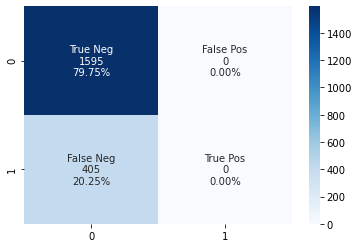

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')

#### With drop out

In [25]:
model2 = Sequential()
model2.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 13))
model2.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model2.add(Dropout(0.05))
model2.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model2.add(Dropout(0.05))
model2.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\Sambo\anaconda3\envs\Tensorflow 2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  
C:\Users\Sambo\anaconda3\envs\Tensorflow 2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sambo\anaconda3\envs\Tensorflow 2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\Sambo\anaconda3\envs\Tensorflow 2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 175
Trainable params: 175
Non-trainable params: 0
________________________________________________________

In [27]:
model2.compile(optimizer = Adam(lr=0.001), loss = "binary_crossentropy", metrics = ['accuracy'])

In [28]:
history2 = model2.fit(X_train, y_train, batch_size = 10, epochs = 20)

C:\Users\Sambo\anaconda3\envs\Tensorflow 2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
8000/8000 [==============================] - 1s 141us/step - loss: 0.4925 - accuracy: 0.7956
Epoch 2/20
8000/8000 [==============================] - 1s 124us/step - loss: 0.4371 - accuracy: 0.7960
Epoch 3/20
8000/8000 [==============================] - 1s 114us/step - loss: 0.4289 - accuracy: 0.7960
Epoch 4/20
8000/8000 [==============================] - 1s 119us/step - loss: 0.4272 - accuracy: 0.7960
Epoch 5/20
8000/8000 [==============================] - 1s 136us/step - loss: 0.4264 - accuracy: 0.8112
Epoch 6/20
8000/8000 [==============================] - 1s 121us/step - loss: 0.4237 - accuracy: 0.8256
Epoch 7/20
8000/8000 [==============================] - 1s 123us/step - loss: 0.4232 - accuracy: 0.8266
Epoch 8/20
8000/8000 [==============================] - 1s 117us/step - loss: 0.4204 - accuracy: 0.8285
Epoch 9/20
8000/8000 [==============================] - 1s 120us/step - loss: 0.4215 - accuracy: 0.8298
Epoch 10/20
8000/8000 [==============================] - 1s 114u

#### Accuracy

In [29]:
# evaluate the model
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)

In [30]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.838, Test: 0.841


In [31]:
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5) #to c

In [32]:
print(classification_report(y_test.astype('int'), y_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.71      0.36      0.48       405

    accuracy                           0.84      2000
   macro avg       0.78      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



#### Confusion matrix

In [33]:
cm2 = confusion_matrix(y_test, y_pred)


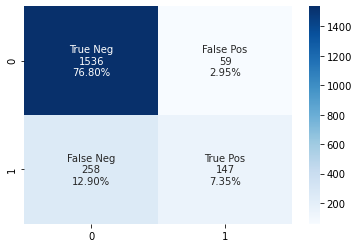

In [34]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues')

#### Prediction

In [35]:
print (y_pred[:15, :])

[[False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]]


# Conclusion

The application of drop out in model 2 increased the precision by 1% which we could use in production.